<a href="https://colab.research.google.com/github/ranjan0601/Retail_Sales_Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Retail Sales Prediction**

##### **Project Type**    - **Regression**
##### **Contribution**    - **Individual**
##### **Team Member 1 -** **Amit Ranjan**


# **Project Summary -**

Rossman Operates over 3000+  drug stores across 7 European Countries. Now the task is to predict the daily sales upto 6 weeks based on the dataset provided. We have been provided a historical sales data for 1,115 Rossman stores. We need to forcast the sales based on data provided. 

# **GitHub Link -**

https://github.com/ranjan0601/Retail_Sales_Prediction

# **Problem Statement**

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.



## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
path = "/content/drive/MyDrive/Almabatter/Capstone Project/"

In [ ]:
Rossman_store = pd.read_csv(path + "Rossmann Stores Data.csv")

In [ ]:
store_data = pd.read_csv(path + "store.csv")

In [ ]:
# Understanding the shape of the dataset
Rossman_store.shape, store_data.shape

((1017209, 9), (1115, 10))

In [ ]:
Rossman_store.head(15)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [ ]:
store_data.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [ ]:
Rossman_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


## ***2. Understanding Your Variables***

## Observation

Rosssman Store has 9 Column with total 1017209 rows. Column DATE & StateHoliday is Object datatype and rest are of integer datatype

In [ ]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## Observation

Store Data has additional information about those stores like store type, assortment, competion etc. It has 1115 rows and 10 columns. StoreType, Assortment, & PromoInterval is Object type rest are int/float.

In [ ]:
# Checking the null value in Rossman dataset
Rossman_store.isnull().sum()  

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
 # Checking the null value in Store Data
store_data.isnull().sum() 

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# Checking duplicate in data
print(len(Rossman_store[Rossman_store.duplicated()]))
#No duplicate in dataset
len(store_data[store_data.duplicated()])    

0


0

## 3. ***Data Wrangling***

## <b> Treating the Null value

In [ ]:
# Understanding Competition distance NaN dataset
store_data[pd.isnull(store_data.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
store_data['CompetitionDistance'].nunique()

654

In [ ]:
# pd.Series(store_data['CompetitionDistance']).hist()
round(store_data['CompetitionDistance'].describe(),0)

count     1112.0
mean      5405.0
std       7663.0
min         20.0
25%        718.0
50%       2325.0
75%       6882.0
max      75860.0
Name: CompetitionDistance, dtype: float64

In [ ]:
store_data['CompetitionDistance'].mode()

0    250.0
Name: CompetitionDistance, dtype: float64

Text(0.5, 0, 'Competition Distance Distribution Plot')

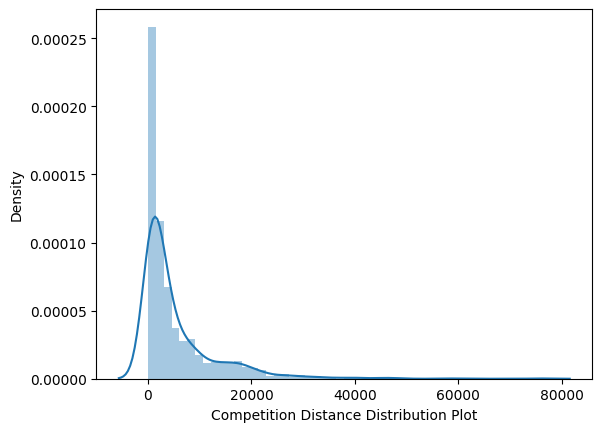

In [ ]:
sns.distplot(x=store_data['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

In [ ]:
# Based on the mean, median and mode replacement logic, we decided to replace the NaN value with Median as it shows that most of the competion are around Median range only.
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace = True)

In [ ]:
store_data['CompetitionDistance'].isnull().sum()

0

In [ ]:
# To check the replace value of CompetitionDistance
rows = store_data.loc[[290, 621, 878]]

In [ ]:
rows

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,2325.0,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,2325.0,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,2325.0,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
# 2. Treating NaN for CompetitionOpenSinceMonth and CompetitionOpenSinceYear
# These are the datatime data where mean or median do not make sense
store_data['CompetitionOpenSinceMonth'].mode()


0    9.0
Name: CompetitionOpenSinceMonth, dtype: float64

In [ ]:
store_data['CompetitionOpenSinceYear'].mode()

0    2013.0
Name: CompetitionOpenSinceYear, dtype: float64

In [ ]:
store_data['CompetitionOpenSinceMonth'].fillna(store_data['CompetitionOpenSinceMonth'].mode()[0], inplace= True)

In [ ]:
# Check the null value, it should be 0 now
store_data['CompetitionOpenSinceMonth'].isnull().sum()

0

In [ ]:
store_data['CompetitionOpenSinceYear'].fillna(store_data['CompetitionOpenSinceYear'].mode()[0], inplace= True)

In [ ]:
# Check the null value, it should be 0 now
store_data['CompetitionOpenSinceYear'].isnull().sum()

0

In [ ]:
# 3. Treating NaN for Promo2SinceWeek, Promo2SinceYear and PromoInterval which as dtype as float, float and object
store_data[pd.isnull(store_data.PromoInterval)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,9.0,2013.0,0,NaN,NaN,NaN


In [ ]:
store_data['Promo2'].unique()

array([0, 1])

In [ ]:
# Doing a pivot to understand the relation b/w Promo2 and Promo%
store_data.groupby('Promo2')['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'].count()

,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Promo2,,,
0,0,0,0
1,571,571,571


### It is clear that where there is 0 Promo2 than the rest of the columns are blank for Promo%. Hence replace all columns by 0 to get ride of NaN

In [ ]:
store_data['Promo2SinceWeek'].fillna(store_data['Promo2SinceWeek']==0, inplace= True)
store_data['Promo2SinceYear'].fillna(store_data['Promo2SinceYear']==0 , inplace= True)
store_data['PromoInterval'].fillna(store_data['PromoInterval']== 0, inplace= True)

In [ ]:
# Satisfy  the output for previous code
store_data['Promo2SinceWeek'].isnull().sum(),store_data['Promo2SinceYear'].isnull().sum(), store_data['PromoInterval'].isnull().sum()

(0, 0, 0)

In [ ]:
# Getting rid of all Null value of storedata
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

## <b> Merging the Rossman data and Store data

In [ ]:
data1 = pd.merge(Rossman_store, store_data, on = "Store", how = "left" )

In [ ]:
data1.shape

(1017209, 18)

In [ ]:
data1.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,False,False,False
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,False,False,False
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,False,False,False
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,False,False,False
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,False,False,False
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,False,False,False
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,False,False,False
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,False,False,False


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
Variables = list(data1.columns)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
data1["CompetitionDistance"].unique(), data1["CompetitionDistance"].max(), data1["CompetitionDistance"].min()

(array([ 1270,   570, 14130,   620, 29910,   310, 24000,  7520,  2030,
         3160,   960,  1070,  1300,  4110,  3270,    50, 13840,  3240,
         2340,   550,  1040,  4060,  4590,   430,  2300,    60,  1200,
         2170,    40,  9800,  2910,  1320,  2240,  7660,   540,  4230,
         1090,   260,   180,  1180,   290,  4880,  9710,   270,  1060,
        18010,  6260, 10570,   450, 30360,  7170,   720,  6620,   420,
         7340,  2840,  5540,   350,  2050,  3700, 22560,   410,   250,
         1130,  4840, 17500,  2200,  1650,   330, 22440, 19960,  3510,
         3320,  7910,  2370, 22390,  2710, 11810,  1870,   480,   560,
        10690,  2380,  2410,   240, 16690, 14620,  1890,  8780,  8980,
        15140, 17930,  2440,   150,  5210,   390,  6190,  1390,  1930,
         2190,  3300, 46590,  7890,  1630, 20930,  4510,  5740,   680,
         3450,  3580,  2100,  2290,  3570, 58260, 16760,  1410,   760,
         3370,  1350,  2000,  2460,   900,   920,  5190,  1730, 25360,
      

In [ ]:
# Competition distance is a continous varaible. For the purpose of visulization we create ranges.
data1["CompetitionDistance_Cat"] = pd.cut(data1["CompetitionDistance"], 5)

<Axes: title={'center': 'Average Customer by Distance Catagory'}, xlabel='CompetitionDistance_Cat'>

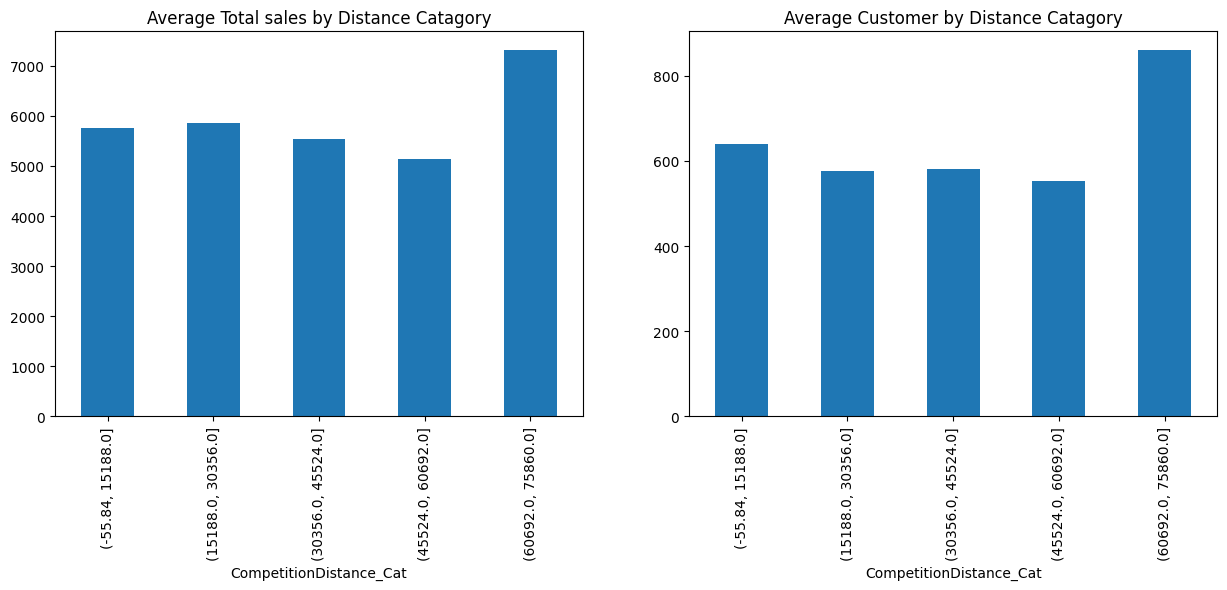

In [ ]:
f, ax = plt.subplots(1,2, figsize = (15,5))
data1.groupby("CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title ="Average Total sales by Distance Catagory", ax = ax[0])
data1.groupby("CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Customer by Distance Catagory", ax = ax[1])

# Observation : It is clearly observed that having increased competition distance average sales and customer both increase for the store.

In [ ]:
# droping the CopetionDistance Catagory column
data1.drop("CompetitionDistance_Cat", axis=1, inplace=True)

In [ ]:
print(Variables)

['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [ ]:
#Creating a categorical list of Columns 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [ ]:
#checking the unique values involved and if all the values are in appropriate datatypes
for col in categorical_variables:
  print(f'Unique values for {col}: {data1[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [False 13.0 14.0 1.0 45.0 40.0 26.0 22.0 5.0 6.0 10.0 31.0 37.0 9.0 39.0
 27.0 18.0 35.0 23.0 48.0 36.0 50.0 44.0 49.0 28.0]
Unique values for Promo2SinceYear: [False 2010.0 2011.0 2012.0 2009.0 2014.0 2015.0 2013.0]
Unique values for PromoInterval: [False 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [ ]:
#Replacing some impurity found in unique command
data1['StateHoliday'].replace({'0':0}, inplace=True)

In [ ]:
# Changing different dtypes to int type.
data1['CompetitionOpenSinceMonth'] = data1['CompetitionOpenSinceMonth'].astype(int, copy = False)
data1['CompetitionOpenSinceYear'] = data1['CompetitionOpenSinceYear'].astype(int, copy= False)
data1['Promo2SinceWeek'] = data1['Promo2SinceWeek'].astype(int, copy = False)
data1['CompetitionDistance'] = data1['CompetitionDistance'].astype(int, copy= False)
data1['Promo2SinceYear'] = data1['Promo2SinceYear'].astype(int, copy= False)

In [ ]:
# Changing the Date formate from object to datetime formate
data1['Date'] = pd.to_datetime(data1['Date'], format= '%Y-%m-%d')

In [ ]:
data1['CompetitionOpenSinceMonth'].dtype, data1['CompetitionOpenSinceYear'].dtype, data1['Promo2SinceWeek'].dtype, data1['Date'].dtype

(dtype('int64'), dtype('int64'), dtype('int64'), dtype('<M8[ns]'))

In [ ]:
# Checking the data type of all column
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [ ]:
# Extracting Year, Month, Week or Day from the Date Column
data1['Year'] = data1['Date'].dt.year
data1['Month'] = data1['Date'].dt.month
# data1['Weekoftheday'] = data1['Date'].dt.dayofweek
# data1['Day'] = data1['Date'].dt.dayofyear

In [ ]:
# data1 = data1.drop('Weekoftheday', axis = 1)

In [ ]:
# data1 = data1.drop("Day", axis = 1)

In [ ]:
data1.head(15)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270,9,2008,0,0,0,False,2015,7
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",2015,7
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",2015,7
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620,9,2009,0,0,0,False,2015,7
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910,4,2015,0,0,0,False,2015,7
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310,12,2013,0,0,0,False,2015,7
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000,4,2013,0,0,0,False,2015,7
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520,10,2014,0,0,0,False,2015,7
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030,8,2000,0,0,0,False,2015,7
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160,9,2009,0,0,0,False,2015,7


## Now we have updated some data type and updated date column for somer further EDA on Overall data

In [ ]:
categorical_variables1 = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'PromoInterval', 'Year', 'Month']

###** By varient analysis w.r.t Sales **

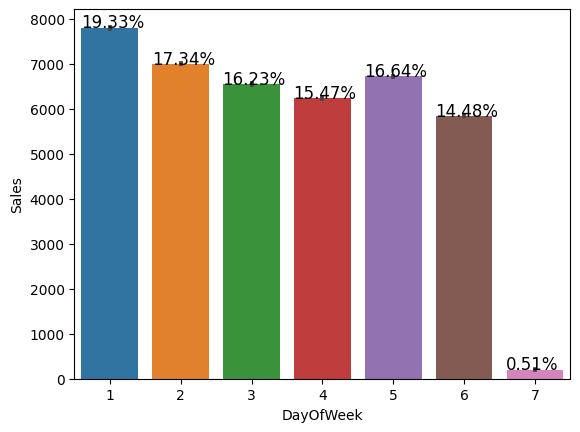

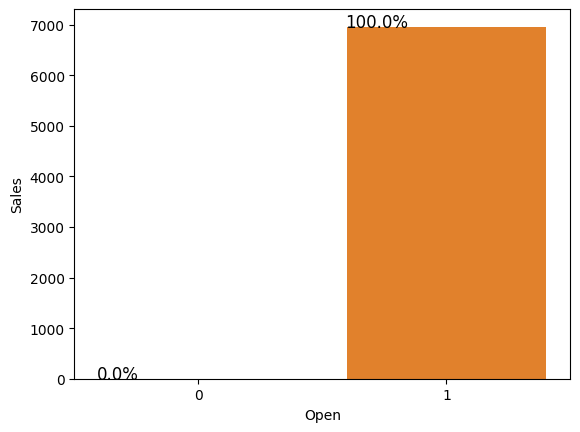

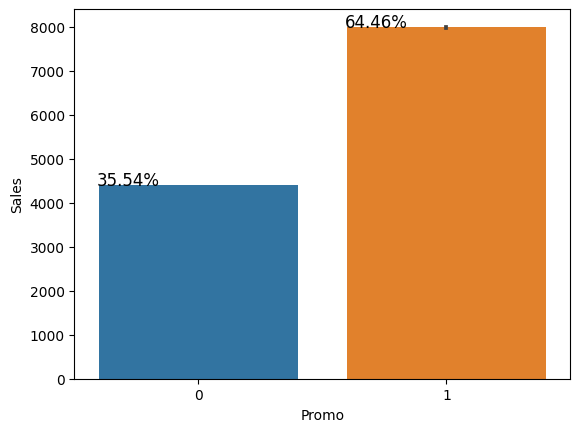

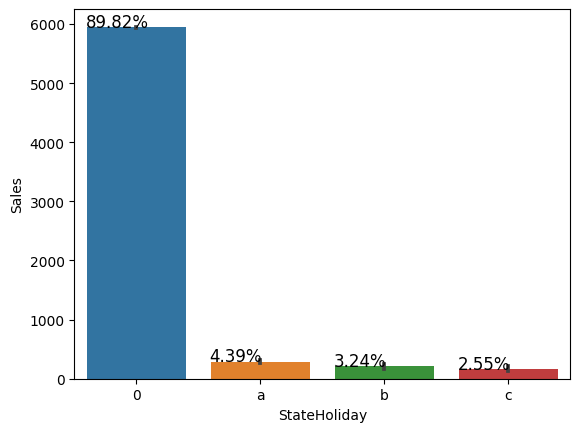

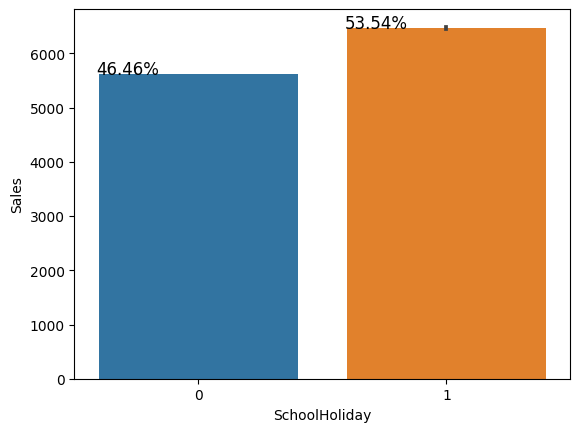

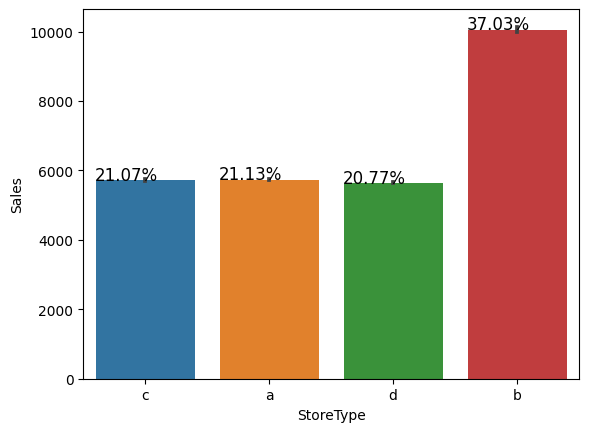

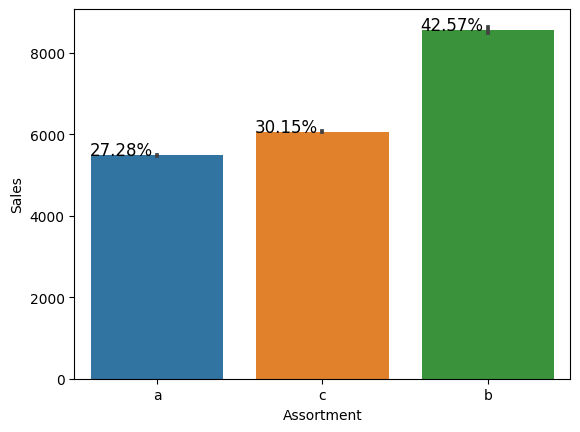

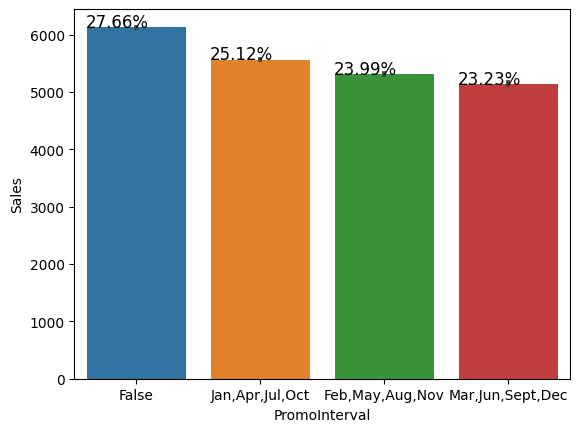

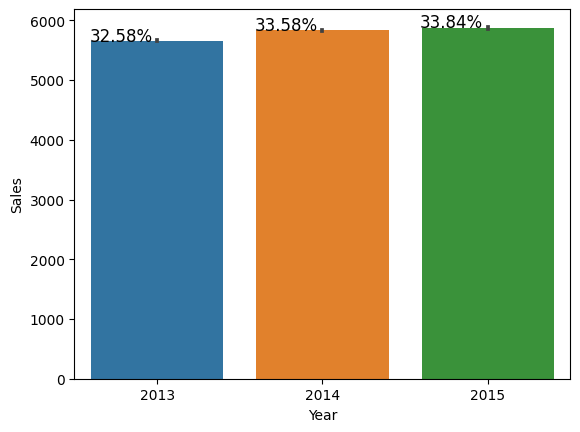

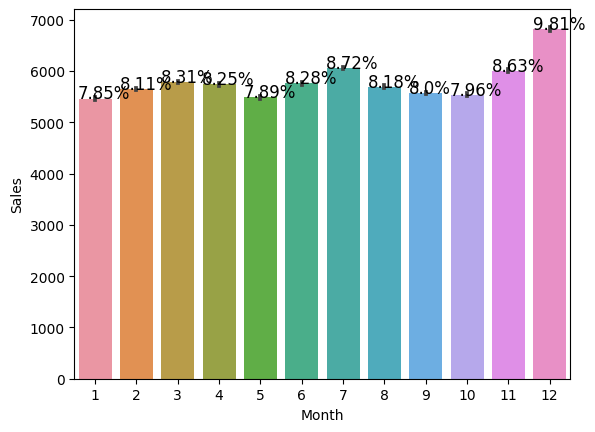

In [ ]:
for value in categorical_variables1:
  ax = sns.barplot(x=data1[value], y=data1['Sales']) 
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

In [ ]:
data1.groupby("Promo")["Sales"].mean()

Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64

# Based on above data we can observe few points as below:

1. In Sales vs Weekday we see highest mean sales on MONDAY and lowest on Sunday (due to store closure on sunday)
2. In sales vs Promo, we see the highest mean sales turnover when there is some promotional event going on.
3. Most of the stores are closed on Stateholiday, however, Most of the stores are open on SchoolHolidays
4. In Sales vs StoreType there is a max mean sales happend on STORE B
5. iN Assortment vs Sales, we can see that max average sales happend for B Assortment type. 
6. In Month vs Sales barplot, we can see that maximum average sales happend in December Month only.

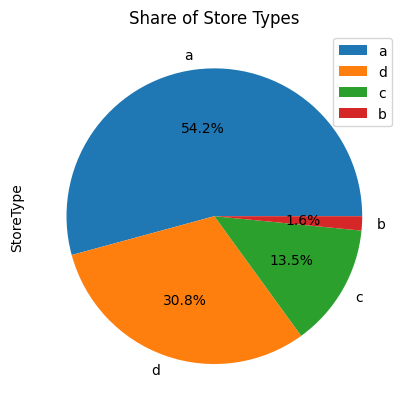

In [ ]:
#store types in all of the dataset
data1["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%')
plt.show()

## This shows that store A has maximum presence followed by Store D, C & B

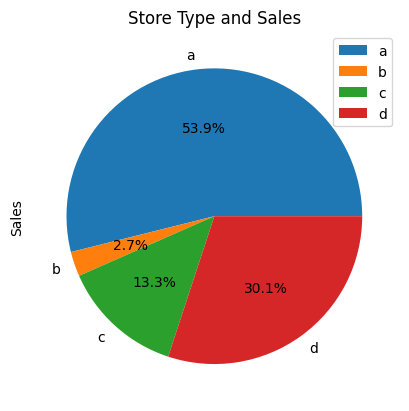

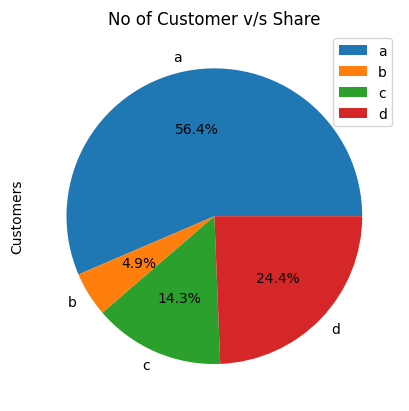

In [ ]:
#let's explore store type a bit and it's influence on sales
data1.groupby("StoreType")["Sales"].sum().plot.pie(title="Store Type and Sales", legend= True, autopct = '%1.1f%%')
plt.show()
#customers and store type
data1.groupby("StoreType")["Customers"].sum().plot.pie(title='No of Customer v/s Share', legend=True, autopct='%1.1f%%')
plt.show()


## This pie plot shows that because of the maximum number stores in Decending sequence A, D, C, B this also follows the trend of max total sales and max total customer in respective stores.

## Multivarient Analysis

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

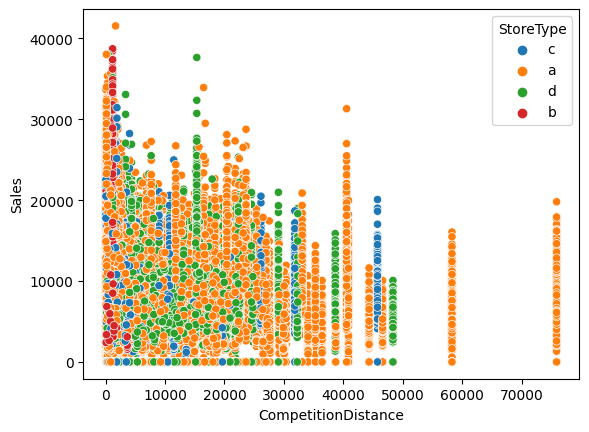

In [ ]:
# Analysis of CompetitionDistance with Sales and storeType
sns.scatterplot(data=data1, x="CompetitionDistance", y="Sales", hue = "StoreType")

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Store Type')

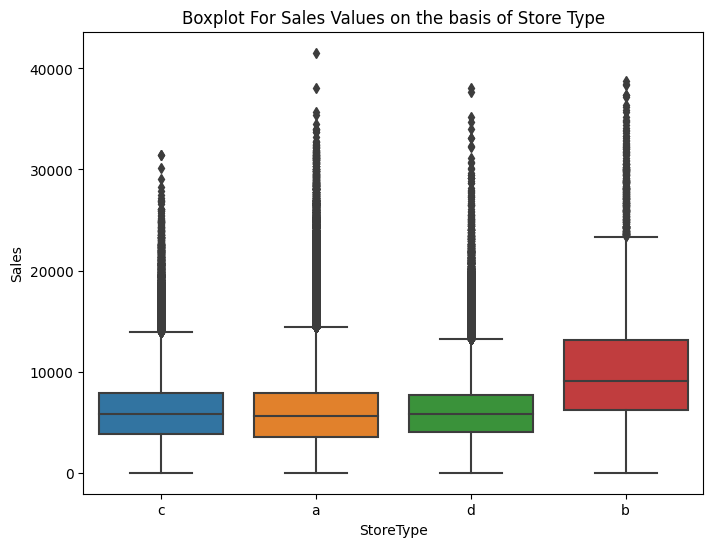

In [ ]:
# Lets understand the Sales vs Store Type with box plot
plt.figure(figsize=(8, 6))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=data1)
plt.title('Boxplot For Sales Values on the basis of Store Type')

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment Type')

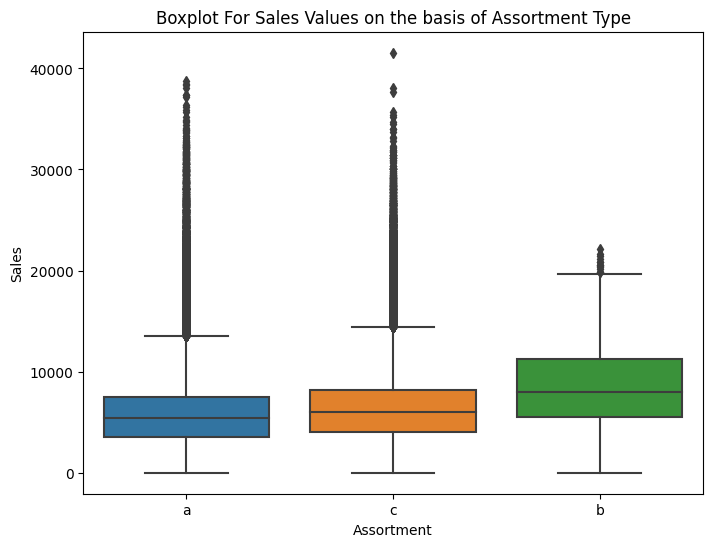

In [ ]:
# Lets understand the Sales vs Assortment with box plot
plt.figure(figsize=(8, 6))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=data1)
plt.title('Boxplot For Sales Values on the basis of Assortment Type')

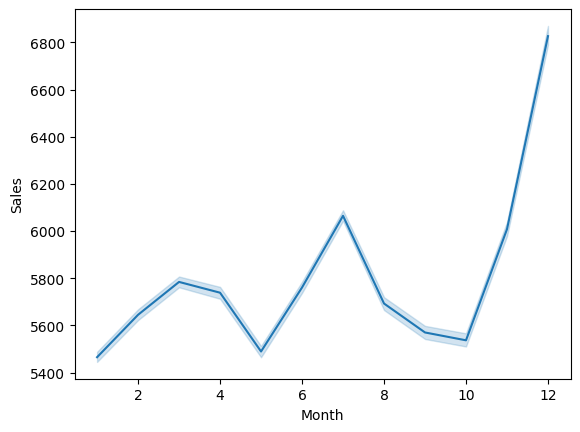

In [246]:
sns.lineplot(x = data1["Month"], y = data1["Sales"])
plt.show()

## We have done EDA now lets go to Feature Engineering

## <b> CONCLUSION FROM EDA
1)From plot sales and competition Open Since Month shows sales go increasing from November and highest in month December.   
2)From plot Sales and day of week, Sales highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to Zero.  
3)Plot between Promotion and Sales shows that promotion helps in increasing Sales.   
4)Type of Store plays an important role in opening pattern of stores.   
5)All Type ‘b’ stores never closed except for refurbishment or other reason.  
6)All Type ‘b’ stores have comparatively higher sales and it mostly constant with peaks appears on weekends.   
7)ssortment Level ‘b’ is only offered at Store Type ‘b’.   
8)We can observe that most of the stores remain closed during State Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays.


## ***5. Feature Engineering & Data Pre-processing***

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [ ]:
data1['StateHoliday'].unique()

array([0, 'a', 'b', 'c'], dtype=object)

In [ ]:
#Changing StateHoliday into boolean
data1['StateHoliday'].replace({'a':1, 'b':1, 'c':1}, inplace= True)

In [ ]:
data1['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [ ]:
## Feature Engineering

In [ ]:
Numerical_features = list(data1.describe())

In [ ]:
Numerical_features.remove("Sales")

In [ ]:
Numerical_features

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'Year',
 'Month']

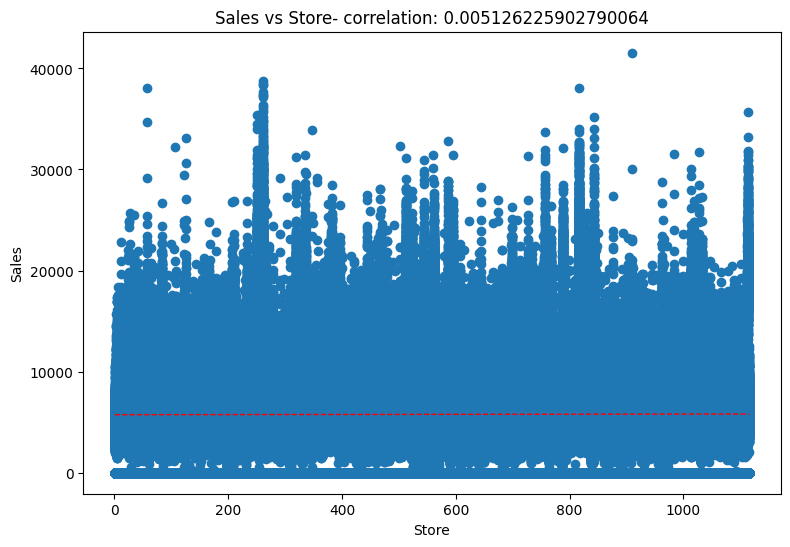

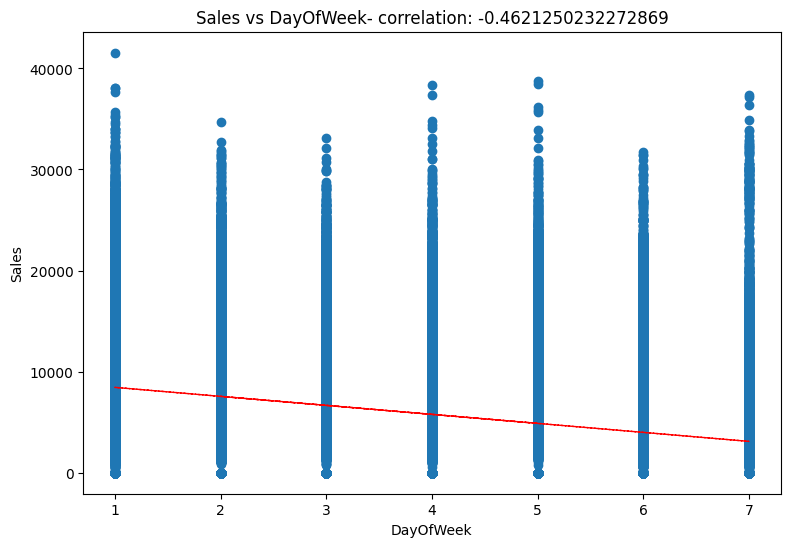

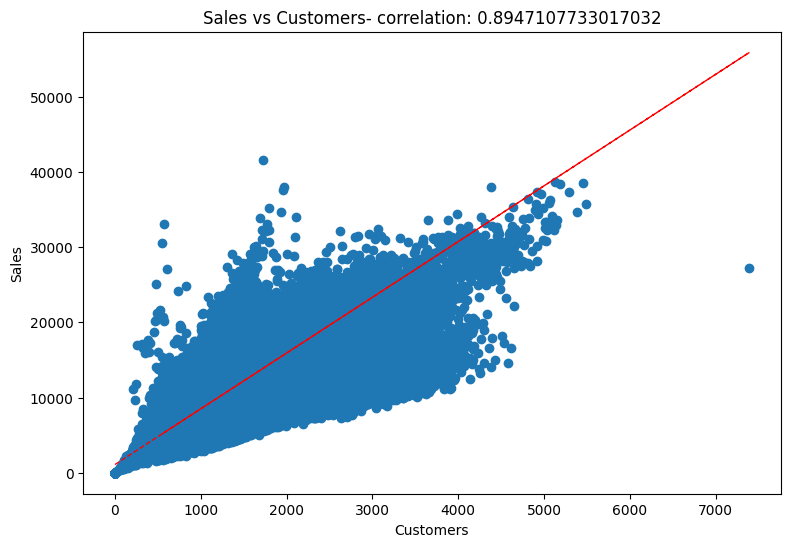

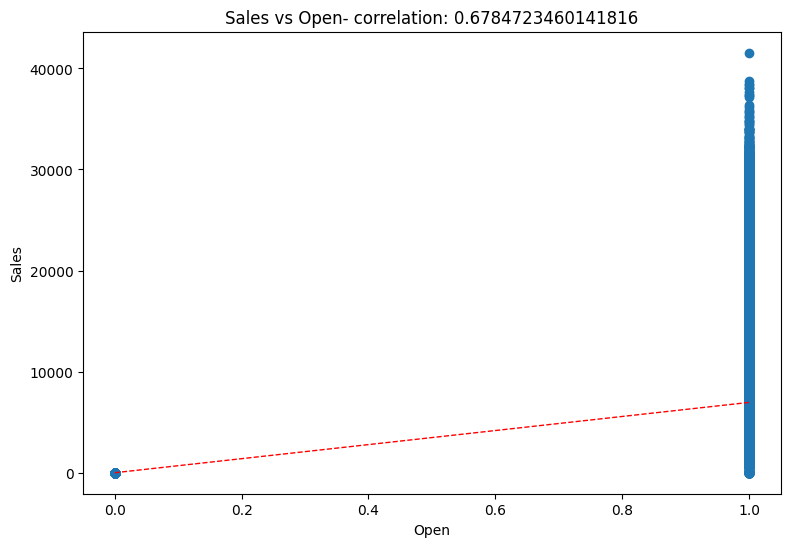

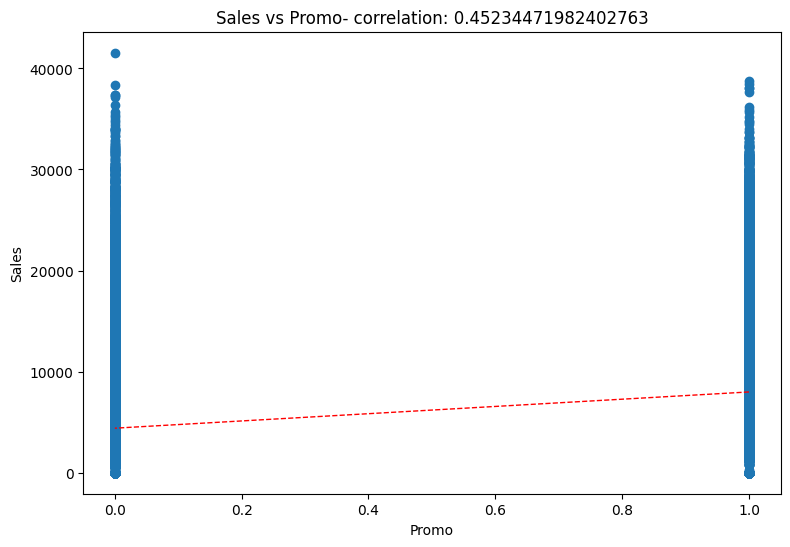

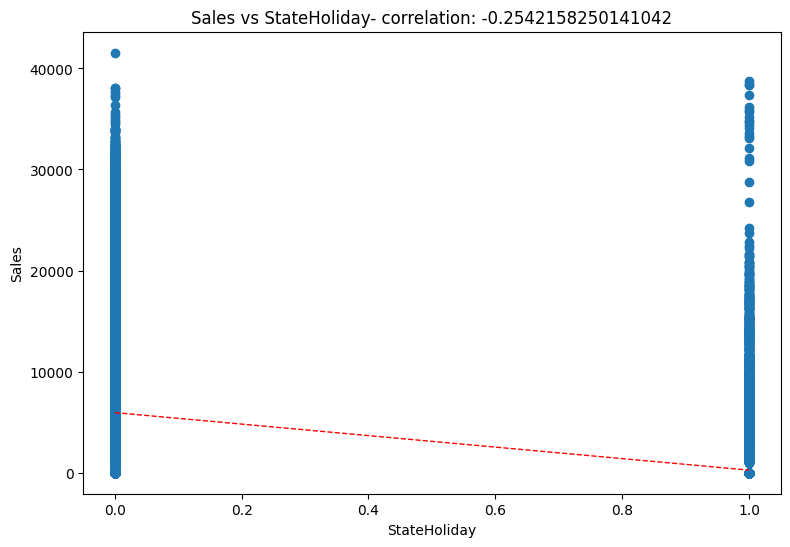

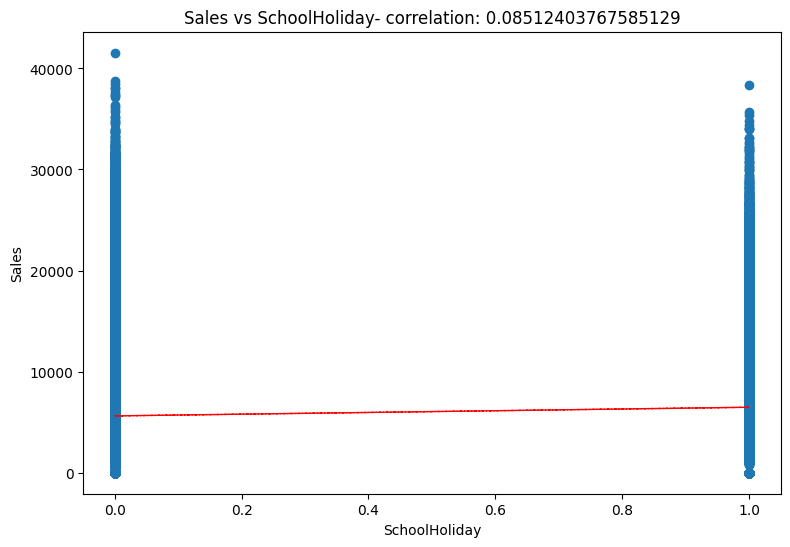

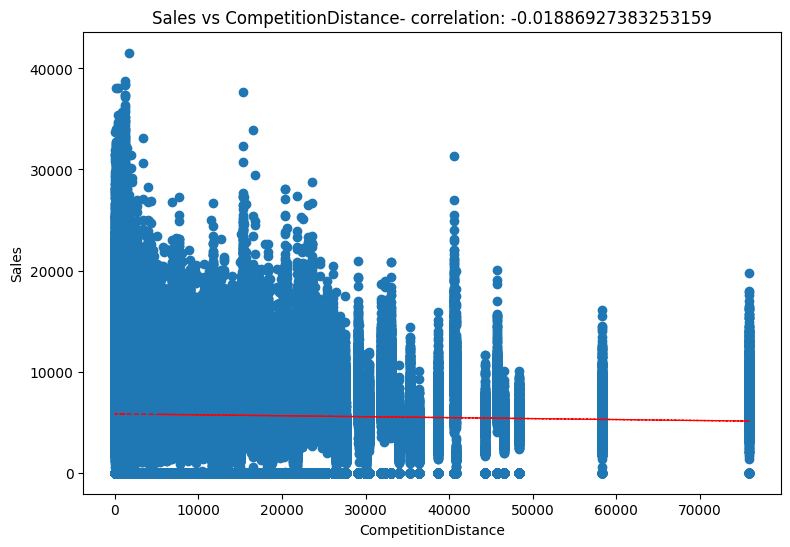

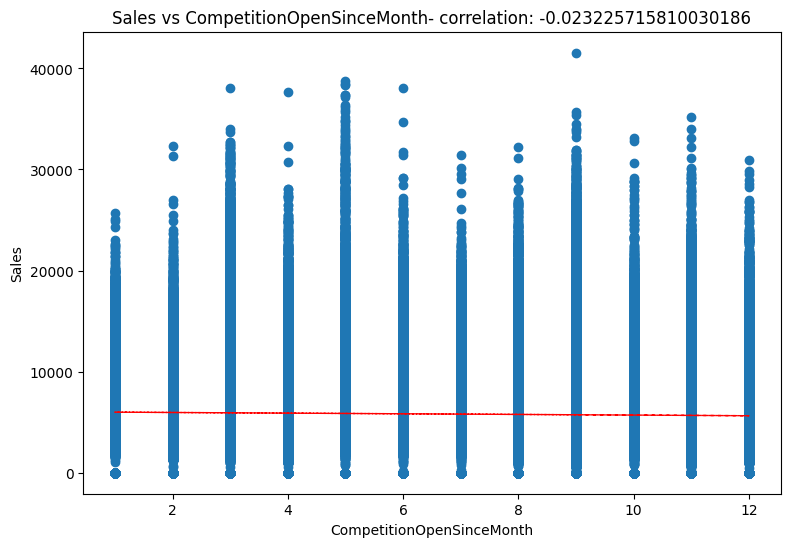

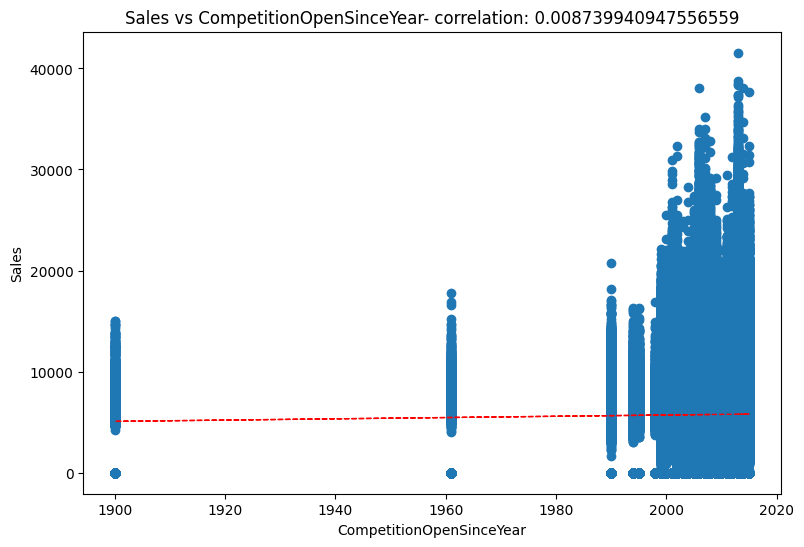

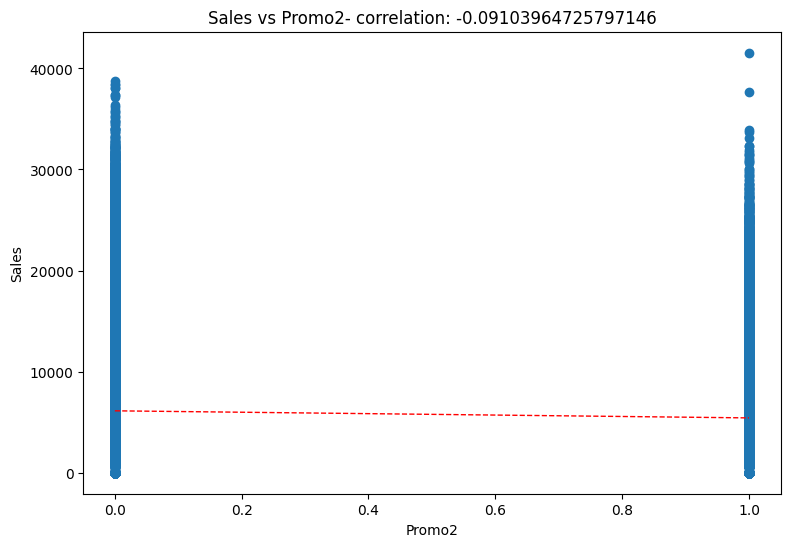

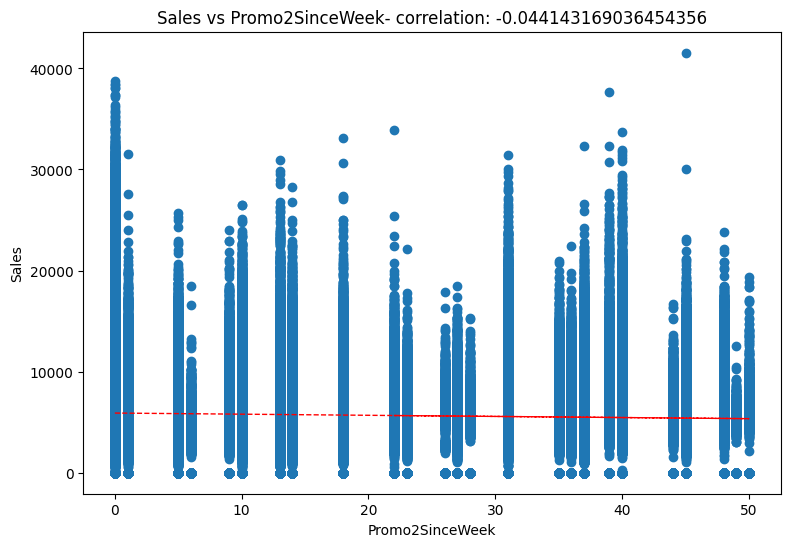

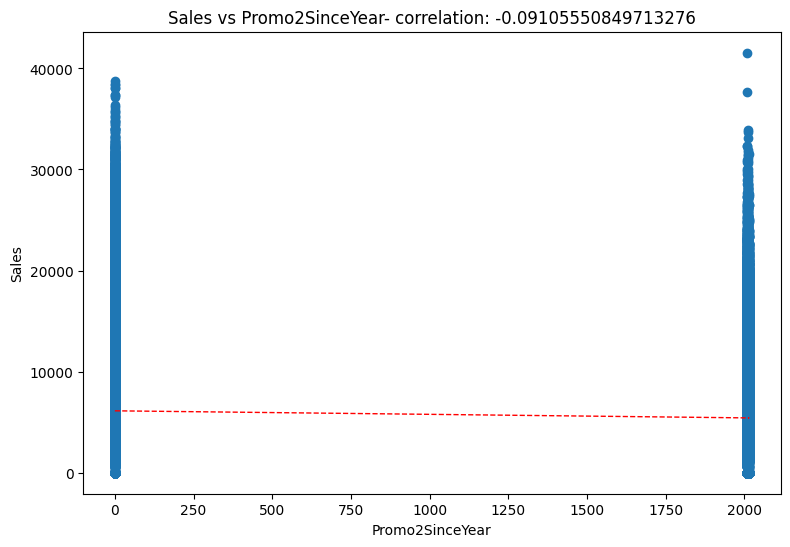

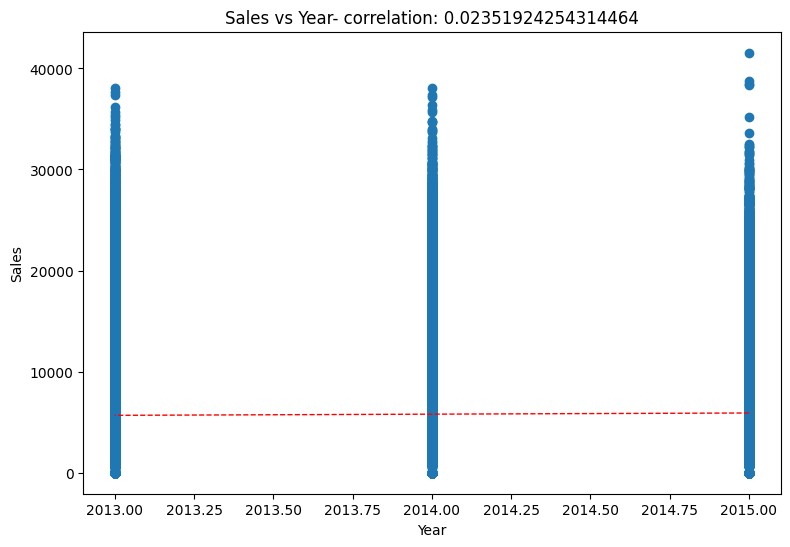

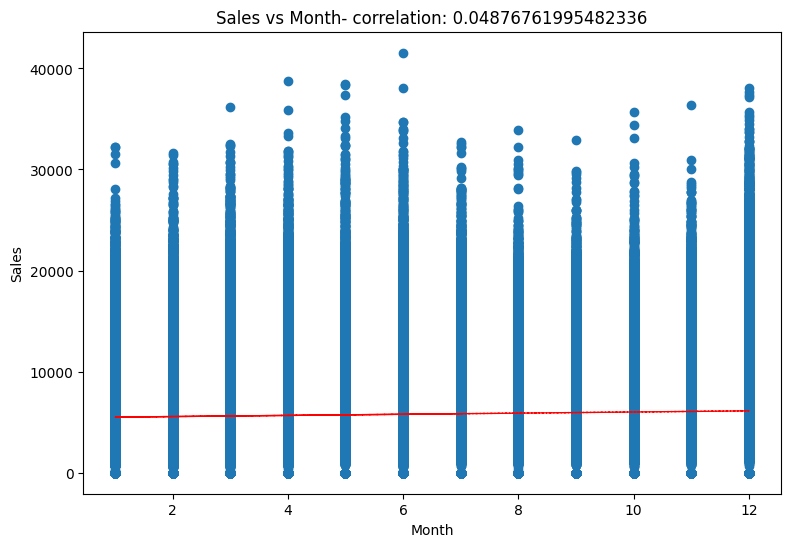

In [ ]:
for col in Numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data1[col]
    label = data1['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data1[col], data1['Sales'], 1)
    y_hat = np.poly1d(z)(data1[col])

    plt.plot(data1[col], y_hat, "r--", lw=1)

plt.show()

<Axes: >

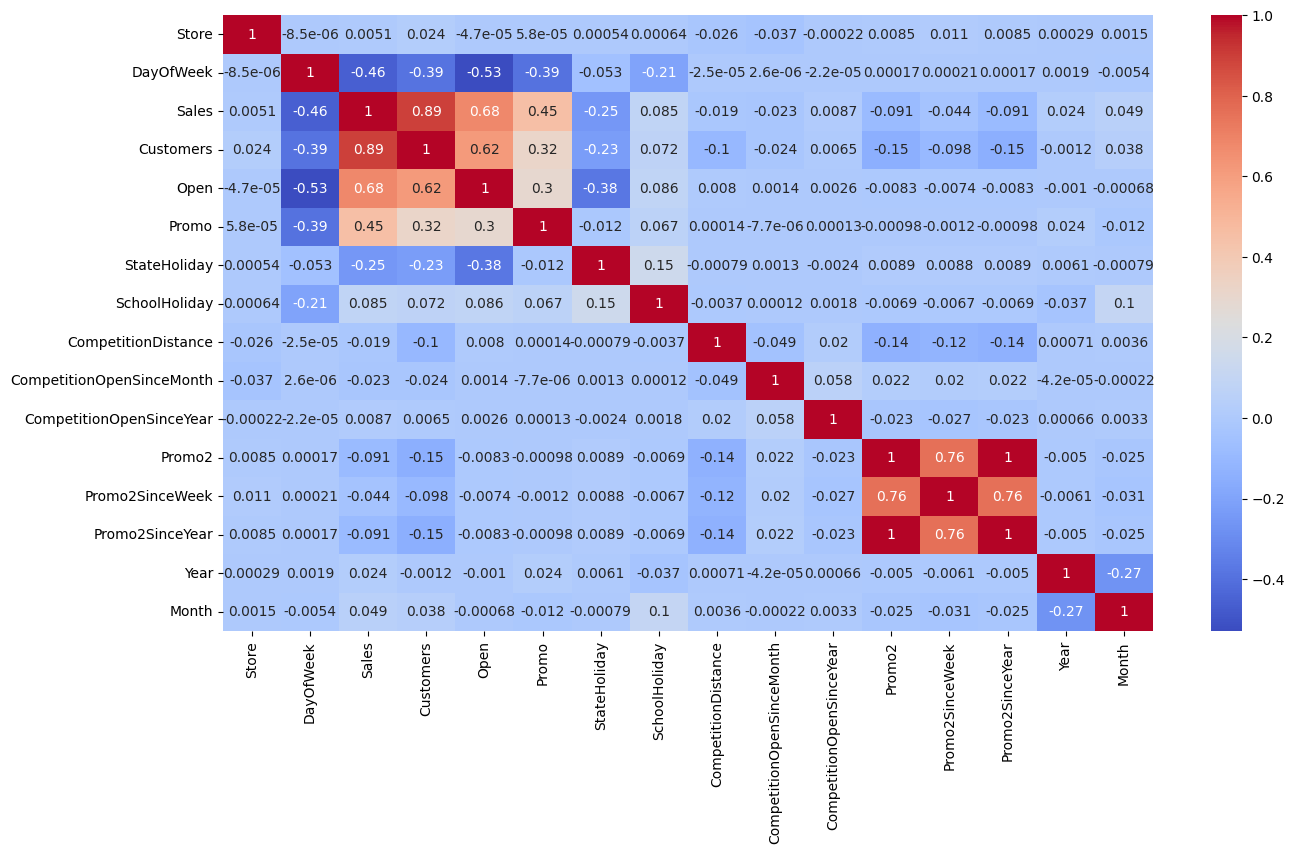

In [ ]:
#correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(data1.corr(), cmap="coolwarm", annot=True)

# Observation:

1. Sales is strogly positively correlated to Customer, Open and Promo event, Which is obvious and logical.
2. Sales has negative correlation with StateHoliday and daysofweek.
3. Promo2, Promo2SinceWeek, & Promo2SinceYear are correlated to each other.

In [ ]:
data1['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [ ]:
data1.groupby("Open")["Sales"].sum()  # Store that are closed has also 0 sales so we can drop the rows of 0 sales

Open
0             0
1    5873180623
Name: Sales, dtype: int64

In [ ]:
data2 = data1[(data1["Open"] != 0) & (data1["Sales"] > 0)] # Removing all 0 values of sales along with Open = 0 parameter, doing this will help in log transformation of sales as log10-0 is infinitiy which was creating problem in log transfromation of sales data

In [ ]:
data2.groupby("Open")["Sales"].sum()

Open
1    5873180623
Name: Sales, dtype: int64

In [ ]:
data2.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month'],
      dtype='object')

In [ ]:
data2.drop("Open", axis=1, inplace= True)

<Axes: xlabel='Sales', ylabel='Density'>

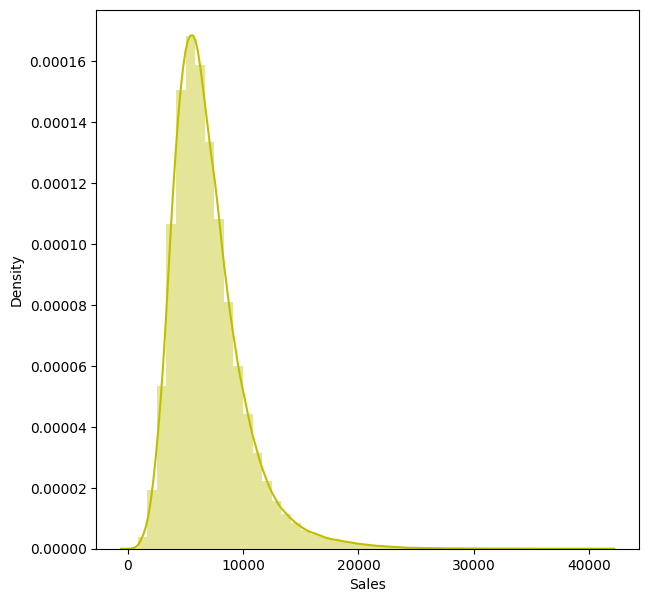

In [ ]:
# Dependent variable 'Price'

plt.figure(figsize = (7,7))
sns.distplot(data2['Sales'], color= "y")

 Here we can see that data is slightly right skewed

<Axes: ylabel='Sales'>

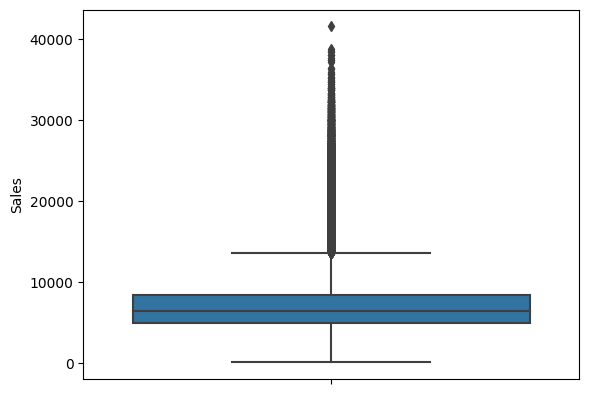

In [ ]:
# Understand the outlier with boxplot on sales.
sns.boxplot(data= data2, y = "Sales")

In [ ]:
# Get the percentile values of Sales
data2["Sales"].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count    844338.000000
mean       6955.959134
std        3103.815515
min          46.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
95%       12668.000000
99%       17789.000000
max       41551.000000
Name: Sales, dtype: float64

In [ ]:
# How many rows has the sales data greater that 17789 becase it is the 99% of the data as per scatterplot.
len(data2[data2["Sales"] > 17789])

8443

In [ ]:
data2.shape

(844338, 19)

There are 8443 rows out of 844338 rows which have sales value as outlier (sales_value > 0.99 percentile), which is 0.9% of overall data. 
Lets remove those row in order to get the normal distribution.

In [ ]:
data2 = data2.drop(data2[data2["Sales"] > 17789].index)

<Axes: ylabel='Sales'>

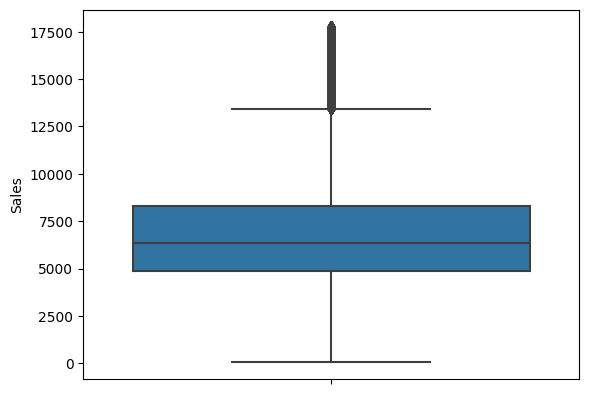

In [ ]:
sns.boxplot(data= data2, y = "Sales")

<Axes: xlabel='Sales', ylabel='Density'>

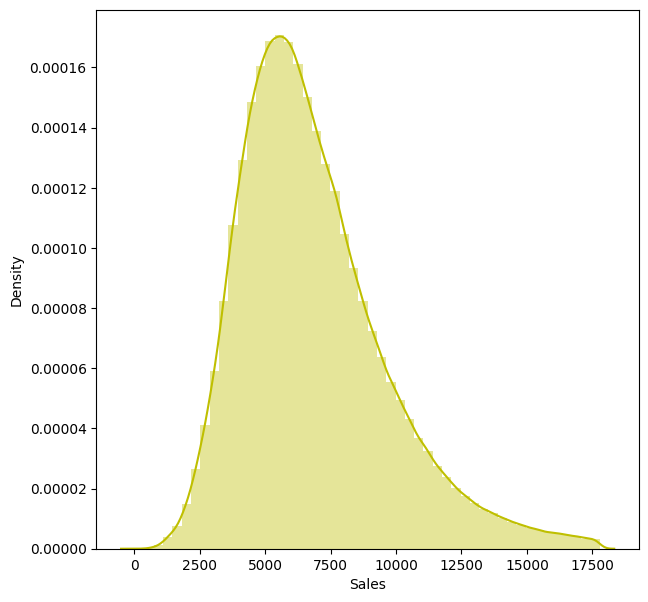

In [ ]:
# Droping the rows with outlier sales value we tried to normalize the data.
plt.figure(figsize = (7,7))
sns.distplot((data2['Sales']), color= "y")

## Observation : The sales column is seems more in normalized form now.

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835895 entries, 0 to 1017190
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      835895 non-null  int64         
 1   DayOfWeek                  835895 non-null  int64         
 2   Date                       835895 non-null  datetime64[ns]
 3   Sales                      835895 non-null  int64         
 4   Customers                  835895 non-null  int64         
 5   Promo                      835895 non-null  int64         
 6   StateHoliday               835895 non-null  int64         
 7   SchoolHoliday              835895 non-null  int64         
 8   StoreType                  835895 non-null  object        
 9   Assortment                 835895 non-null  object        
 10  CompetitionDistance        835895 non-null  int64         
 11  CompetitionOpenSinceMonth  835895 non-null  int64  

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835895 entries, 0 to 1017190
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      835895 non-null  int64         
 1   DayOfWeek                  835895 non-null  int64         
 2   Date                       835895 non-null  datetime64[ns]
 3   Sales                      835895 non-null  int64         
 4   Customers                  835895 non-null  int64         
 5   Promo                      835895 non-null  int64         
 6   StateHoliday               835895 non-null  int64         
 7   SchoolHoliday              835895 non-null  int64         
 8   StoreType                  835895 non-null  object        
 9   Assortment                 835895 non-null  object        
 10  CompetitionDistance        835895 non-null  int64         
 11  CompetitionOpenSinceMonth  835895 non-null  int64  

In [ ]:
data2.PromoInterval.unique()

array([False, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [ ]:
data2 = pd.get_dummies(data2, columns= ["StoreType"])

In [ ]:
data2 = pd.get_dummies(data2, columns = ["Assortment"])

In [ ]:
data2 = pd.get_dummies(data2, columns = ["PromoInterval"])

## <B> Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import zscore

## <B> Multicollinearity Check

## Applying VIF Factor to check the Multicollinearity among independent column

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(data2[[i for i in data2.describe().columns if i not in ["Store","Sales", "Promo2", "StoreType_a", "StoreType_b", "StoreType_c", "StoreType_d", "Assortment_a", "Assortment_b", "Assortment_c", "PromoInterval_False", "PromoInterval_Feb,May,Aug,Nov", "PromoInterval_Jan,Apr,Jul,Oct", "PromoInterval_Mar,Jun,Sept,Dec", "CompetitionOpenSinceYear"]]])

,variables,VIF
0,DayOfWeek,5.785566
1,Customers,6.102856
2,Promo,2.018124
3,StateHoliday,1.003150
4,SchoolHoliday,1.282285
5,CompetitionDistance,1.581178
6,CompetitionOpenSinceMonth,8.917667
7,Promo2SinceWeek,3.721706
8,Promo2SinceYear,4.897850
9,Year,27.592363


In [ ]:
# Dependent variable
Dependent_variables = "Sales"

In [ ]:
# Independent variables
Independent_variables = ["DayOfWeek", "Customers", "Promo", "StateHoliday", "SchoolHoliday", "CompetitionDistance", "CompetitionOpenSinceMonth", "Promo2SinceWeek", "Promo2SinceYear", "Year", "Month"]

In [ ]:
# Create data for Independent variables
x = data2[Independent_variables].values

In [ ]:
# Creating data for dependent variable
y = data2[Dependent_variables].values

In [ ]:
# splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(668716, 11)
(167179, 11)


## ***6. ML Model Implementation***

### ML Model - 1

# <b> Linear Regresssion

In [ ]:
reg = LinearRegression().fit(x_train, y_train)

In [ ]:
reg_train_score = reg.score(x_train, y_train)
reg_train_score

0.7073798127236628

In [ ]:
reg_test_score = reg.score(x_test, y_test)
reg_test_score

0.705103707512889

In [ ]:
reg.coef_

array([-6.21727945e+01,  6.01222723e+00,  1.30226796e+03, -1.94829967e+03,
        4.18798415e+01,  3.51664394e-02, -4.97428998e+00,  1.08929879e+01,
        2.21886405e-02,  1.76036592e+02,  3.93740023e+01])

In [ ]:
reg.intercept_

-353070.2271567053

In [ ]:
y_pred = reg.predict(x_test)
y_pred

array([ 6312.72509581, 10398.31923368,  6830.40932501, ...,
        7806.26280303,  4092.64545688,  8815.45771721])

In [ ]:
y_pred_train = reg.predict(x_train)
y_pred_train

array([5786.93864966, 9076.60547914, 4198.18169869, ..., 5773.61587554,
       5386.36248078, 6586.01532808])

In [ ]:
y_test

array([5059, 9408, 7863, ..., 8018, 3935, 6926])

In [ ]:
y_train

array([6497, 8189, 4405, ..., 6768, 5355, 7389])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2262187.81066682
RMSE : 1504.0571168233007


In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

MSE : 2262187.81066682
RMSE : 1504.0571168233007


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

R2 : 0.705103707512889


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 :", r2)

R2 : 0.705103707512889


### ML Model - 2

## <b> LASSO

In [ ]:
L1 = Lasso(alpha = 0.2, max_iter = 10000)

In [ ]:
L1.fit(x_train, y_train)

Lasso(alpha=0.2, max_iter=10000)

In [ ]:
L1_train_score = L1.score(x_train, y_train)
L1_train_score

0.7073745799959357

In [ ]:
L1_test_score = L1.score(x_test, y_test)
L1_test_score

0.7051063247394478

In [ ]:
y_pred_lasso = L1.predict(x_test)

In [ ]:
pd.DataFrame(zip(y_test, y_pred_lasso), columns = ["actual", "pred"])

,actual,pred
0,5059,6310.598400
1,9408,10398.077594
2,7863,6830.363654
3,8627,7868.839047
4,6585,6180.321863
...,...,...
167174,13428,12383.694528
167175,3262,3794.524864
167176,8018,7806.079306
167177,3935,4092.126523


### ML Model - 3

## <b> RIDGE

In [ ]:
ridge = Ridge(alpha = 0.4)

In [ ]:
ridge.fit(x_train, y_train)

Ridge(alpha=0.4)

In [ ]:
y_pred_ridge = ridge.predict(x_test)

In [ ]:
ridge_train_score = ridge.score(x_train, y_train)
ridge_train_score

0.7073798125483294

In [ ]:
ridge_test_score = ridge.score(x_test, y_test)
ridge_test_score

0.7051037492268177

In [ ]:
MSE = mean_squared_error(y_test, y_pred_ridge)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = (RMSE/y_test.mean()) *100
print("RMPSE :", RMPSE)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :", r2)

MSE : 2262187.490673848
RMSE : 1504.0570104466944
RMPSE : 22.083187634252262
R2 : 0.7051037492268177


### ML Model - 4

## <b> Running Grid Search Cross Validation for Ridge Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.4, 0.8, 1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.4, 0.8, 1, 5, 10, 20, 30, 40, 45, 50,
                                   55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
y_pred_ridge_cv = ridge_regressor.predict(x_test)

In [ ]:
ridge_cv_test_score = ridge_regressor.score(x_test, y_test)
ridge_cv_test_score

-2262187.01653031

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -2250295.6753658704


In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_ridge_cv))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge_cv))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge_cv)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 2262187.01653031
RMSE : 1504.056852825155
R2 : 0.7051038110356431
Adjusted R2 :  0.7050844061406663


### ML Model - 5

# <b> Implementing Elastic net Regression

In [ ]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet_train_score = elasticnet.score(x_train, y_train)
elasticnet_train_score

0.7052337146038093

In [ ]:
elasticnet_test_score = elasticnet.score(x_test, y_test)
elasticnet_test_score

0.7031299583735314

In [ ]:
y_pred_en = elasticnet.predict(x_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_en)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 2277328.6969991364
RMSE : 1509.0820709951915
R2 : 0.7031299583735314
Adjusted R2 :  0.7031104235941916


### ML Model - 6

# <b> Decision Tree Regression

In [ ]:
tree = DecisionTreeRegressor()
treereg = tree.fit(x_train, y_train)

In [ ]:
treereg_train_score = treereg.score(x_train, y_train)
treereg_train_score

0.999945893550475

In [ ]:
treereg_test_score = treereg.score(x_test, y_test)
treereg_test_score

0.9318708283364406

In [ ]:
y_pred_tree = treereg.predict(x_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_tree))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_tree))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_tree)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 522627.7359687985
RMSE : 722.9299661577174
R2 : 0.9318708283364406
Adjusted R2 :  0.9318663452692785


### ML Model - 7

## <b> Random Forest

In [ ]:
random_forest = RandomForestRegressor(n_estimators =500,max_depth=8)
random_forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=500)

In [ ]:
rf_predict = random_forest.predict(x_test)

In [ ]:
rf_test_score = random_forest.score(x_test, y_test)
rf_test_score

0.8194387203120874

In [ ]:
rf_train_score = random_forest.score(x_train, y_train)
rf_train_score

0.8204048160390155

In [ ]:
MSE  = mean_squared_error(y_test, rf_predict)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, rf_predict)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (rf_predict)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 1385109.0583183612
RMSE : 1176.9065631214576
R2 : 0.8194387203120874
Adjusted R2 :  0.8194268389355205


# **Conclusion**

In [ ]:
score_df = pd.DataFrame({'Train_Score':[reg_train_score,L1_train_score,ridge_train_score,elasticnet_train_score, treereg_train_score, rf_train_score],'Test_Score':[reg_test_score,L1_test_score,ridge_test_score,elasticnet_test_score, treereg_test_score, rf_test_score]},index=['Linear Regression','Lasso Regression','Ridge Regression',"Elastic net", "Decision Tree", "Random Forest"])
score_df

,Train_Score,Test_Score
Linear Regression,0.707380,0.705104
Lasso Regression,0.707375,0.705106
Ridge Regression,0.707380,0.705104
Elastic net,0.705234,0.703130
Decision Tree,0.999946,0.931871
Random Forest,0.820405,0.819439


## <b> Conclusion from Model Training

Based on the 7 Model trained on the dataset, we have seen that Linear Regression, Lasso, Ridge & Elastic net has not so good score as they all are giving a train/Test Score of arround 70% Only. 
We also have figured from Decisioni tree is that it is slight overfit as it has a very high accuracy on Train data and score drops heavely on test data.

Hence we can go for Random Forest Model as Final because it has good accuracy which is around 82% & also has very slight difference in Test Score. 